In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
import os
path = os.listdir('./data/Training')
classes = {'no_tumor':0,'pituitary_tumor':1}

In [63]:
import cv2
X=[]
Y=[]
for cls in classes:
    pth = './data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [64]:
np.unique(Y)

array([0, 1])

In [65]:
X= np.array(X)
Y = np.array(Y)

In [66]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [67]:
X.shape

(1222, 200, 200)

Visualize Data

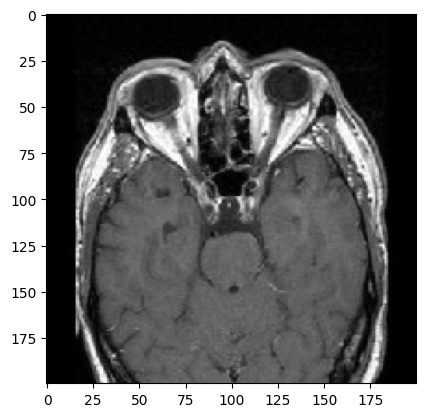

In [68]:
plt.imshow(X[0],cmap='gray')

Prepare Data

In [69]:
X_updated = X.reshape(len(X),-1)
X_updated.shape


(1222, 40000)

Split Data

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(X_updated,Y,random_state=10,test_size=.2)

In [71]:
xtrain.shape,xtest.shape

((977, 40000), (245, 40000))

Feature Scaling

In [72]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Train Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [74]:
lg = LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)


LogisticRegression(C=0.1)

In [75]:
sv = SVC ()
sv.fit(xtrain,ytrain)

SVC()

Evaluation

In [76]:
print("Training Score: ", lg.score(xtrain,ytrain))
print('Testing Score: ',lg.score(xtest,ytest))

Training Score:  1.0
Testing Score:  0.9591836734693877


In [77]:
print("Training Score: ", sv.score(xtrain,ytrain))
print('Testing Score: ',sv.score(xtest,ytest))

Training Score:  0.9938587512794268
Testing Score:  0.963265306122449


Prediction

In [78]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [79]:
pred[36]

0

In [80]:
ytest[36]

1

TEST MODEL

In [83]:
dec ={0:'No Tumor',1:'Positive Tumor'}

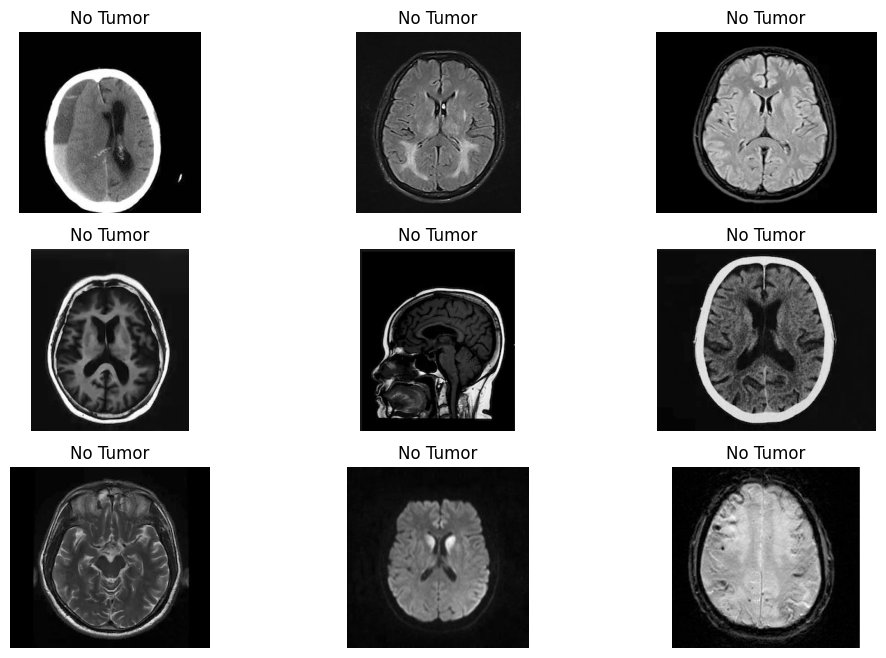

In [90]:
plt.figure(figsize=(12,8))
p=os.listdir('./data/Testing/')
c=1
for i in os.listdir('./data/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('./data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p =sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

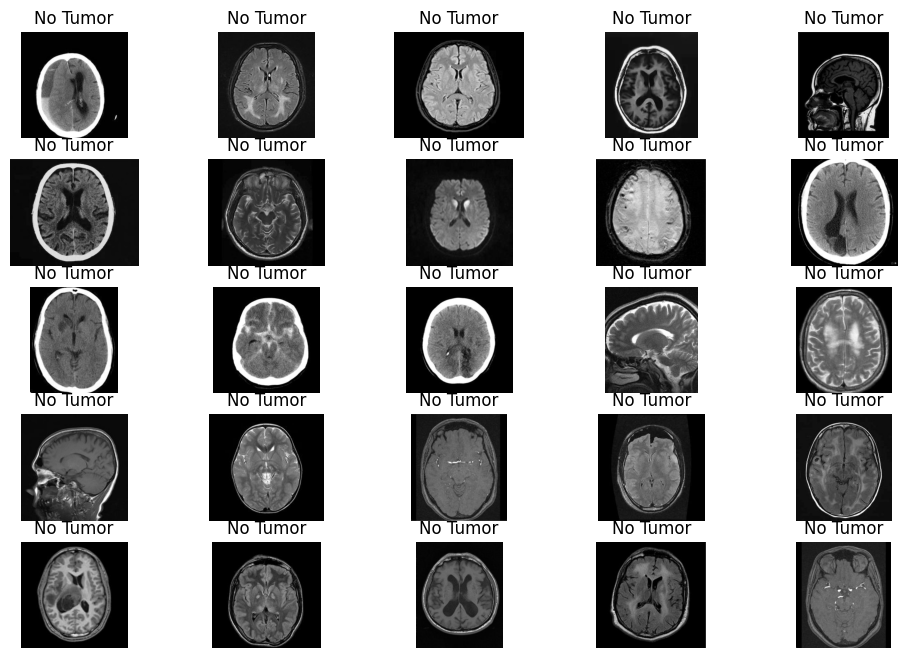

In [92]:
plt.figure(figsize=(12,8))
p=os.listdir('./data/Testing/')
c=1
for i in os.listdir('./data/Testing/no_tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('./data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p =sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1